In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  object 
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  float64
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
 10  Deck          12970 non-null  object 
 11  Side          12970 non-null  object 
 12  HomePlanet    12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Data to be predicted
desired_col = df[df['Transported'].isnull()]
desired_col = desired_col.drop(['Transported'], axis = 1)

In [6]:
desired_col.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_None,CryoSleep_True,Destination_None,Destination_PSO J318.5-22,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8696,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [7]:
#Training data
tr_data = df.copy()
tr_data = tr_data.dropna()

In [8]:
tr_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_None,CryoSleep_True,Destination_None,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
X = tr_data.drop('Transported', axis = 1)
y = tr_data['Transported']

In [10]:
y = y.astype('int64')

## Decision tree classifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
base_pred = model.predict(X_test)

In [17]:
## Оценка работы модели

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [18]:
confusion_matrix(y_test,base_pred)

array([[607, 244],
       [216, 672]], dtype=int64)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


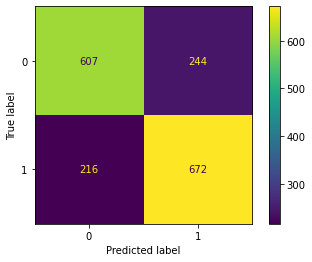

In [19]:
plot_confusion_matrix(model,X_test,y_test)

In [20]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       851
           1       0.73      0.76      0.75       888

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [21]:
model.feature_importances_

array([0.14060352, 0.07729097, 0.09378421, 0.07165   , 0.10471963,
       0.1104284 , 0.00297662, 0.2431046 , 0.        , 0.00772079,
       0.02222726, 0.00757692, 0.00051649, 0.00437572, 0.00616115,
       0.00444372, 0.01552256, 0.00744462, 0.04061302, 0.00313246,
       0.        , 0.00899072, 0.01137231, 0.00819946, 0.00622831,
       0.00091652])

In [22]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.140604
RoomService,0.077291
FoodCourt,0.093784
ShoppingMall,0.071650
Spa,0.104720
VRDeck,0.110428
CryoSleep_None,0.002977
CryoSleep_True,0.243105
Destination_None,0.000000
Destination_PSO J318.5-22,0.007721


<AxesSubplot:xlabel='Transported', ylabel='Age'>

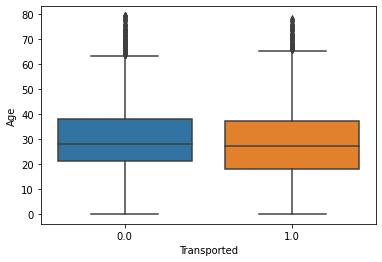

In [23]:
sns.boxplot(x='Transported',y='Age',data=tr_data)

In [24]:
from sklearn.tree import plot_tree

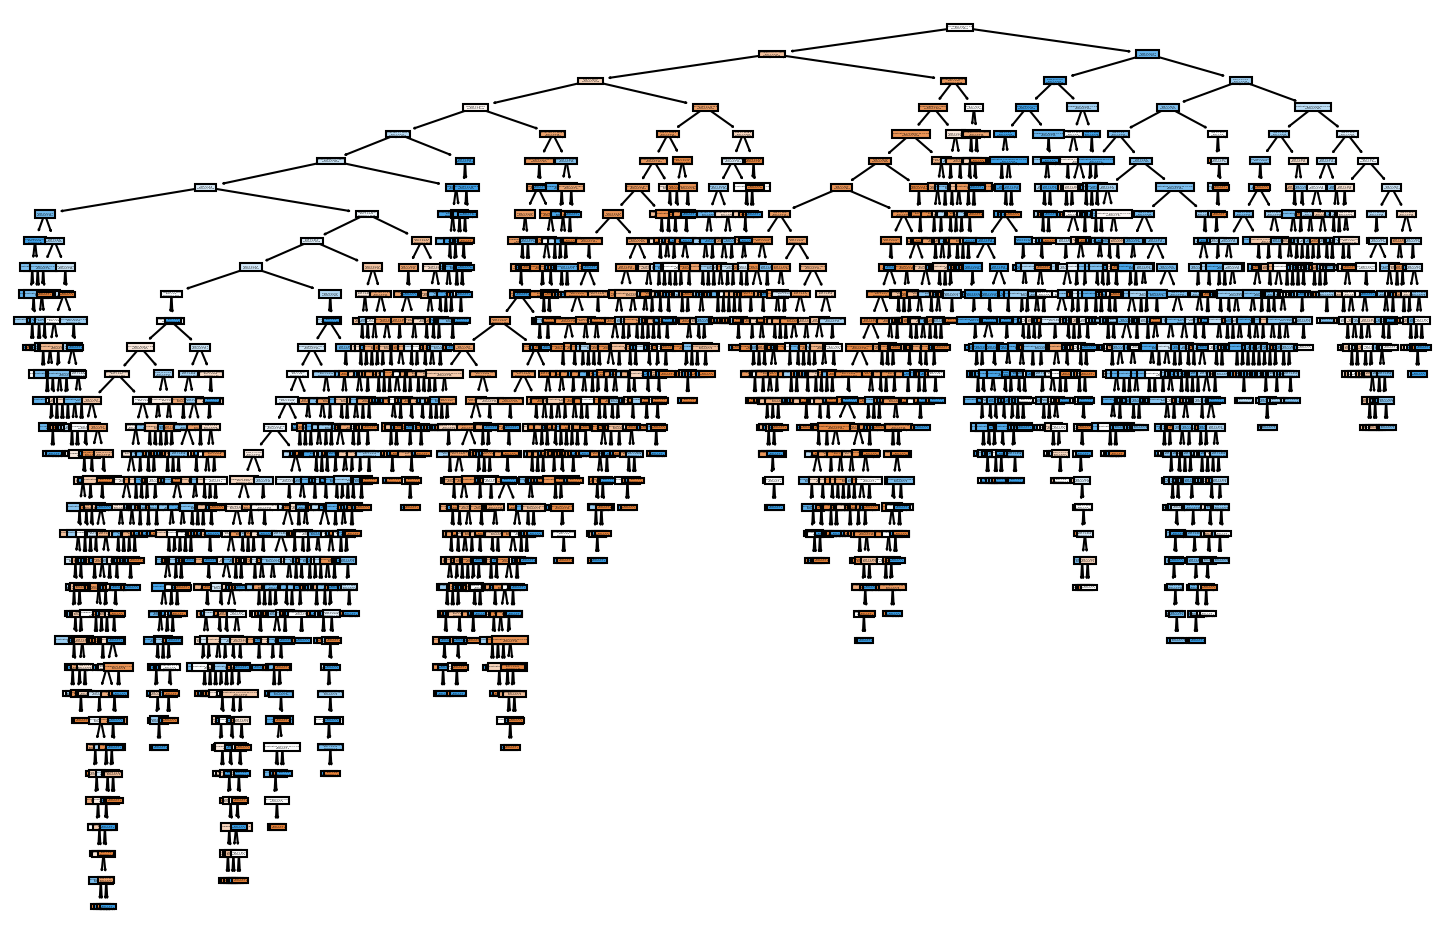

In [25]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [26]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [35]:
pruned_tree = DecisionTreeClassifier(max_depth=6)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       851
           1       0.74      0.86      0.79       888

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739





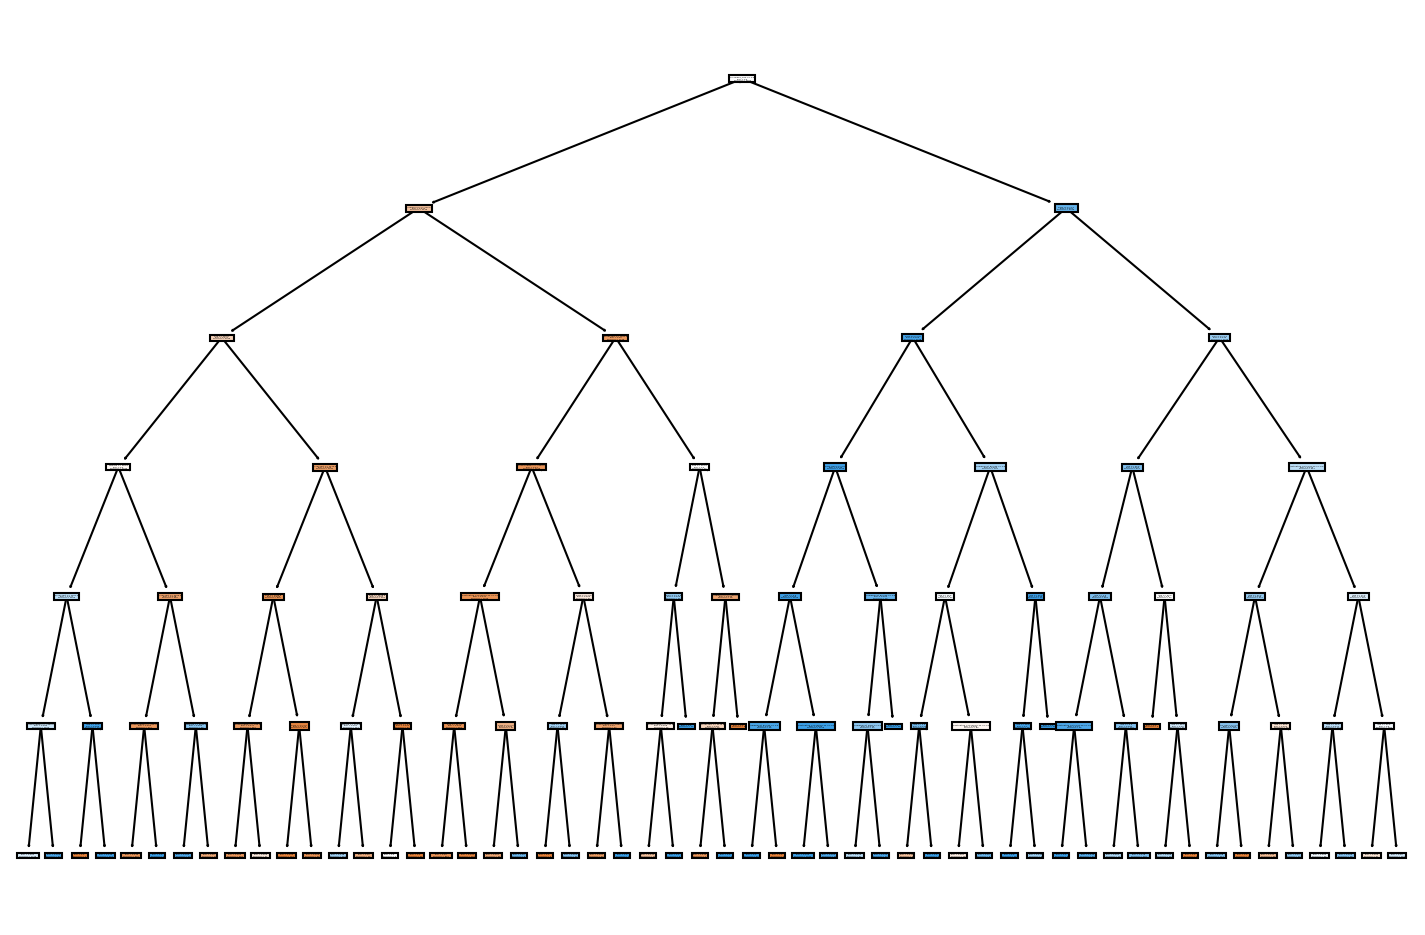

In [36]:
report_model(pruned_tree)

In [53]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       851
           1       0.73      0.84      0.78       888

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.75      1739
weighted avg       0.76      0.76      0.76      1739





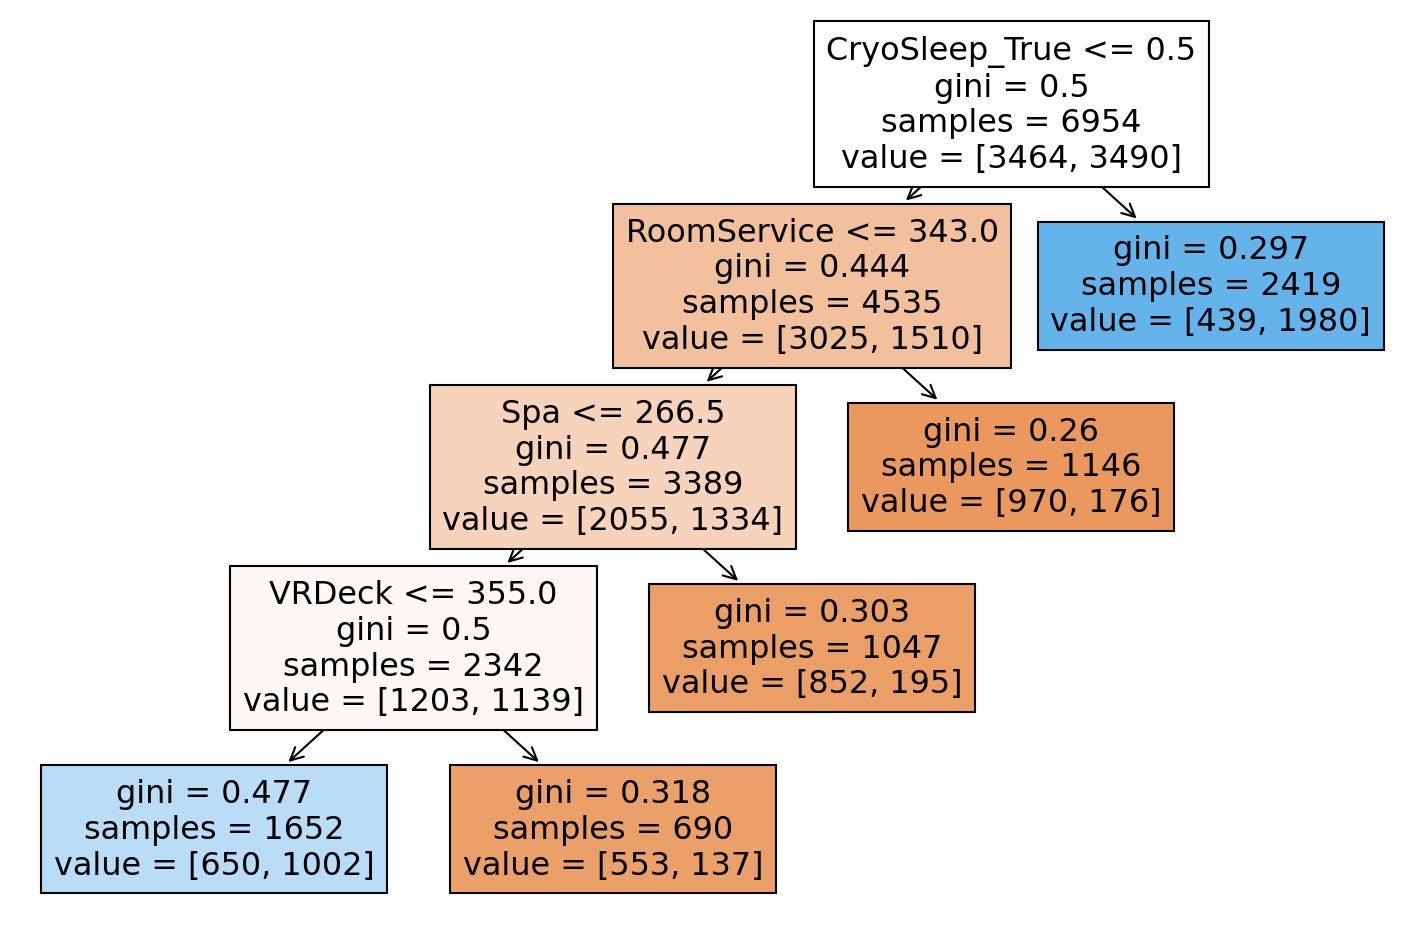

In [54]:
report_model(pruned_tree)

In [99]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))

In [265]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10)
entropy_tree.fit(X_train,y_train)
# max_depth=8 - 77%
# max_leaf_nodes=10 - 76

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10)

In [266]:
report_model(entropy_tree)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       851
           1       0.75      0.84      0.79       888

    accuracy                           0.78      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.78      0.77      1739



In [235]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])\
.sort_values('Feature Importance', ascending=False)

,Feature Importance
CryoSleep_True,0.243105
Age,0.140604
VRDeck,0.110428
Spa,0.104720
FoodCourt,0.093784
RoomService,0.077291
ShoppingMall,0.071650
Deck_G,0.040613
Destination_TRAPPIST-1e,0.022227
Deck_E,0.015523


In [269]:
des_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)
des_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

In [270]:
report_model(des_tree)

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       851
           1       0.75      0.85      0.80       888

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [253]:
model = DecisionTreeClassifier()

In [254]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(2,11)),
              'min_samples_leaf': list(range(2,11)),
              'max_features': [None, 'sqrt', 'log'],
              'max_leaf_nodes': list(range(2,11))}

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
grid = GridSearchCV(model,param_grid)

In [257]:
grid.fit(X_train,y_train)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7290 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7290 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79852\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79852\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\79852\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 281, in fit
    raise ValueError(
ValueError: Invalid value for max_features. Allowed string values are 'aut

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [258]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 2}

In [259]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [260]:
y_pred = grid.predict(X_test)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


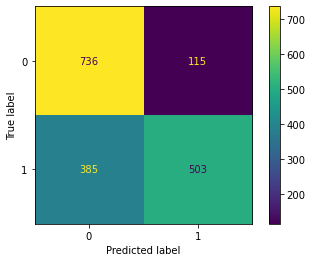

In [261]:
plot_confusion_matrix(grid,X_test,y_test);

In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       851
           1       0.81      0.57      0.67       888

    accuracy                           0.71      1739
   macro avg       0.74      0.72      0.71      1739
weighted avg       0.74      0.71      0.71      1739



In [263]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
  'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
  'max_features': [None, 'sqrt', 'log'],
  'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [271]:
final_model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

In [272]:
final_model.fit(X, y)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

In [273]:
final_pred = final_model.predict(X)

In [274]:
print(classification_report(y,final_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4315
           1       0.81      0.80      0.80      4378

    accuracy                           0.80      8693
   macro avg       0.80      0.80      0.80      8693
weighted avg       0.80      0.80      0.80      8693



In [275]:
result = final_model.predict(desired_col)

In [276]:
test = pd.read_csv('test.csv')

In [277]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':result})
submission['Transported'] = submission['Transported'].astype(int)
print(submission.shape)

(4277, 2)


In [278]:
submission['Transported'].value_counts()

0    2178
1    2099
Name: Transported, dtype: int64

In [279]:
submission['Transported'] = submission['Transported'].astype('bool')

In [280]:
filename = 'space_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: space_preds.csv
